In [3]:
from nt_toolbox.general import *
from nt_toolbox.signal import *
import cv2
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/salmakertit/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [21]:
name = 'barbara.jpg'
n = 512
M = load_image(name, n)

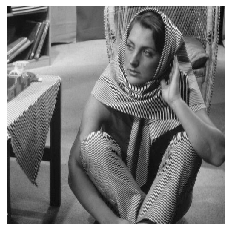

In [22]:
# notre image intiale
imageplot(M)

In [23]:
# FFT ( Fast Fourier Transform ) de l'image
Mf = fft2(M)
#Transformée de Fourrier
Lf = fftshift(log(abs(Mf) + 1e-1))

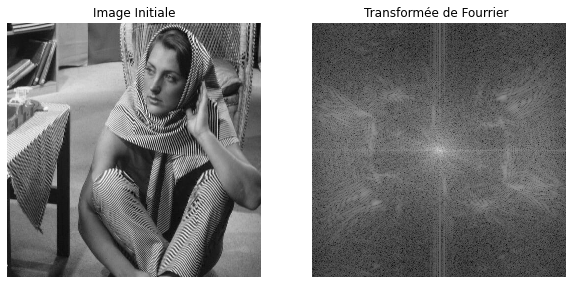

In [24]:
fig=plt.figure(figsize=(10,10))
imageplot(M, 'Image Initiale', [1, 2, 1])
imageplot(Lf, 'Transformée de Fourrier ', [1, 2, 2])

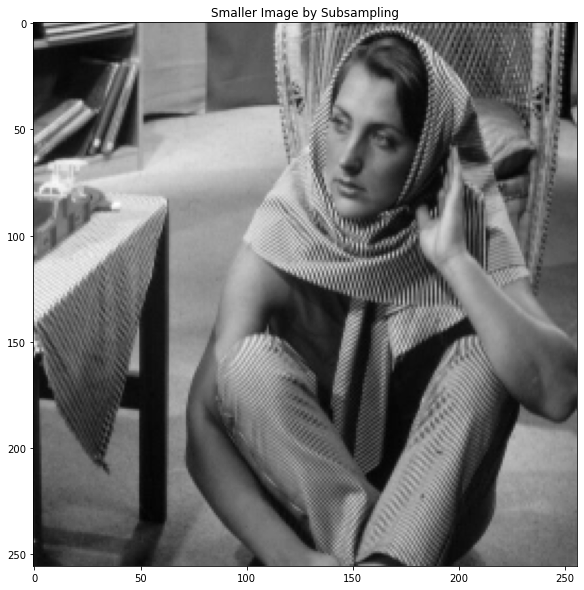

In [25]:
#Smaller - subsampling :

s=cv2.resize(M, (0,0), fx=0.5, fy=0.5)
fig=plt.figure(figsize=(10,10))
plt.title('Smaller Image by Subsampling')
plt.imshow(s, cmap='gray')


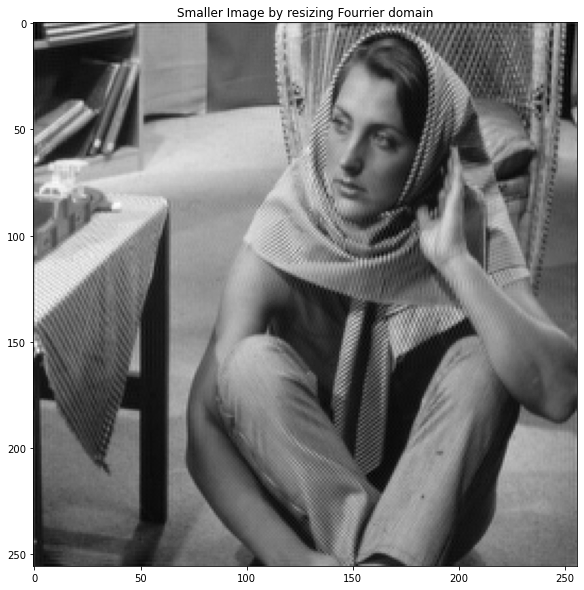

In [28]:
#Smaller by resizing Fourrier domain : 
def  center(img, cx, cy) :
    x,y=  img.shape
    startx= x//2-(cx//2)
    starty= y//2-(cy//2)    
#shift frequency components to the center.
    return img[startx:startx+cx,starty:starty+cy]

#we use img after Shift: FFT of Barbara
#crop the image
img=fftshift(Mf)
new=center(img, 256, 256)
#inverse shift
neww=np.fft.ifftshift(new)
#inverse fourier transform 
img_back=np.fft.ifft2(neww)
img_back=np.abs(img_back)

fig=plt.figure(figsize=(10,10))
plt.title('Smaller Image by resizing Fourrier domain')
plt.imshow(img_back, cmap='gray')

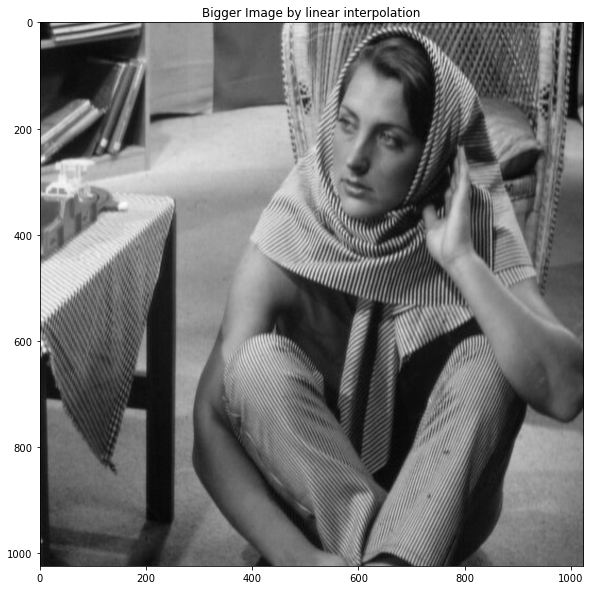

In [29]:
#Bigger image - Linear Interpolation
b=cv2.resize(M, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
fig=plt.figure(figsize=(10,10))
plt.title('2_1')

plt.title('Bigger Image by linear interpolation')
plt.imshow(b, cmap='gray')

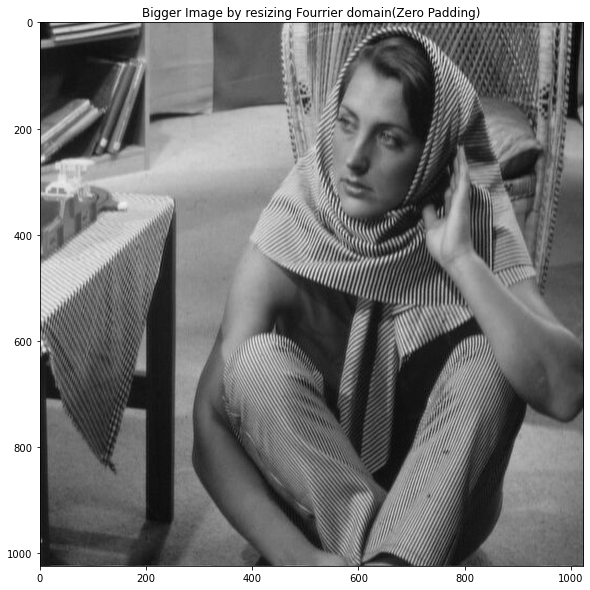

In [31]:
#Bigger image - Linear Interpolation
def  zero(img, zx, zy) :
    zero=np.zeros((zx*2, zy*2), dtype=complex)
    x,y=  img.shape
    startx= x//2-(zx//2)
    starty= y//2-(zy//2)  
    zero[startx:startx+zx,starty:starty+zy] = img
    return zero
#we use img after shift: FFT of Barbara

img=fftshift(Mf)
pad=zero(img, 512, 512)
#inverse shift & FFT
padd=np.fft.ifftshift(pad)
img_back=np.fft.ifft2(padd)
img_back=np.abs(img_back)

fig=plt.figure(figsize=(10,10))

plt.title('Bigger Image by resizing Fourrier domain(Zero Padding)')
plt.imshow(img_back, cmap='gray')
